In [6]:
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq


/var/folders/g0/0ymp9yy178g159xmbf9r15k40000gn/T/ipykernel_70310/2202608040.py:6: WavFileWarning: Chunk (non-data) not understood, skipping it.
  impulse_out_rate, impulse_out = wavfile.read(impulse_output_path)


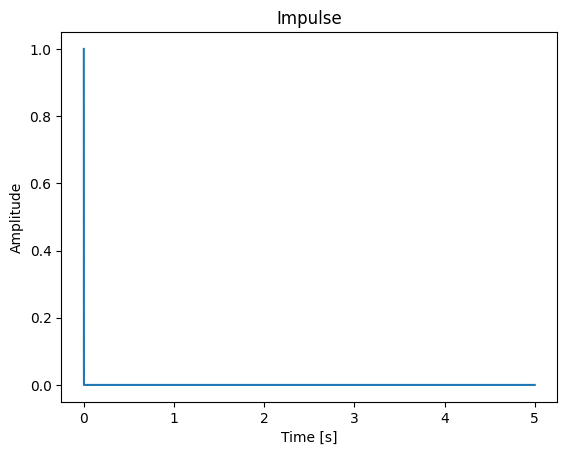

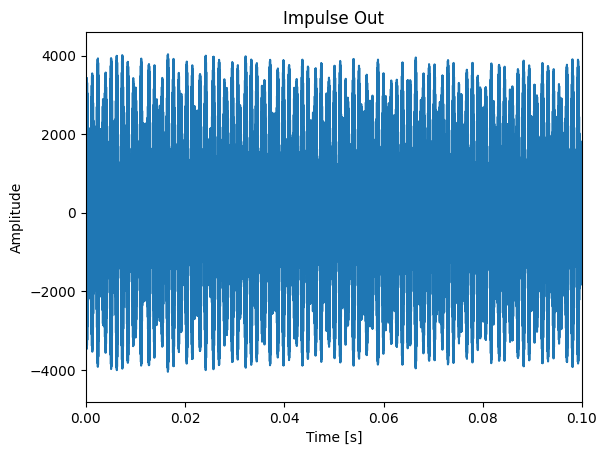

In [7]:
impulse_path = "inputs/impulse.wav"
impulse_output_path = "impulse aup/impulse_out.wav"

impulse_rate, impulse = wavfile.read(impulse_path)

impulse_out_rate, impulse_out = wavfile.read(impulse_output_path)


#plot impulse
t = np.linspace(0, len(impulse)/impulse_rate, len(impulse))
plt.plot(t,impulse)
plt.title("Impulse")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")

plt.show()

#plot impulse out
t = np.linspace(0, len(impulse_out)/impulse_out_rate, len(impulse_out))
plt.plot(t,impulse_out)
plt.title("Impulse Out")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.xlim(0, 0.1)
plt.show()



In [8]:
def apply_fft(data, sample_rate):
    # Perform FFT
    N = len(data)
    yf = fft(data)

    # obtener frecuencias
    xf = fftfreq(N, 1 / sample_rate)

    # Calcular magnitud y fase
    magnitude = np.abs(yf)
    phase = np.angle(yf)

    return xf[:N // 2], magnitude[:N // 2], phase[:N // 2] # devolver solo frecuencias positivas

# Dibuja el diagrama de Bode
def plot_bode(frequencies, magnitude, phase):

    plt.figure(figsize=(8, 6))
    # dibujar magnitud
    plt.subplot(2, 1, 1)
    plt.plot(frequencies, 20 * np.log10(magnitude))
    plt.xscale('log')
    plt.xlim(20,20000)
    plt.title('Magnitude')
    plt.ylabel('Magnitude (dB)')
    plt.grid(which='both', axis='both')

    # dibujar fase
    plt.subplot(2, 1, 2)
    plt.plot(frequencies, np.degrees(phase))
    plt.xscale('log')
    plt.title('Phase')
    plt.xlabel('Frequency (Hz)')
    plt.xlim(20,20000)
    plt.ylabel('Phase (degrees)')
    plt.grid(which='both', axis='both')
    

    plt.tight_layout()

    plt.show()

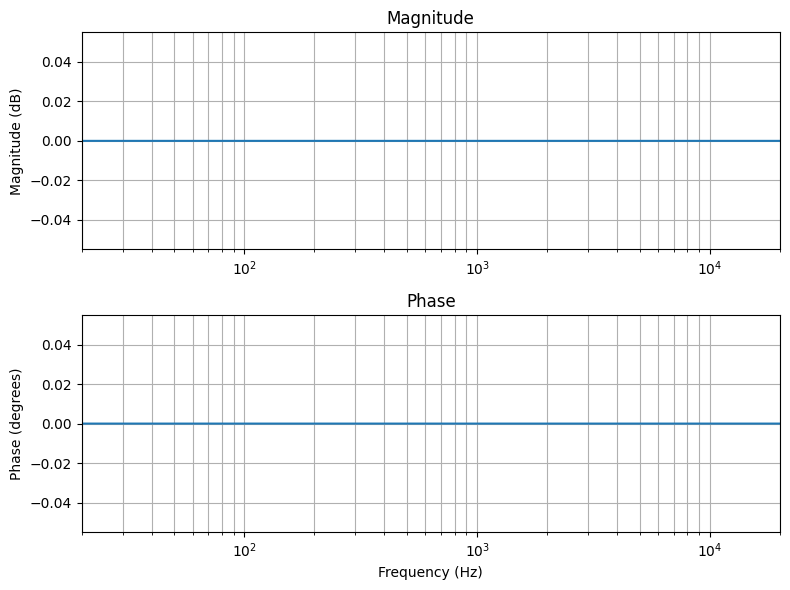

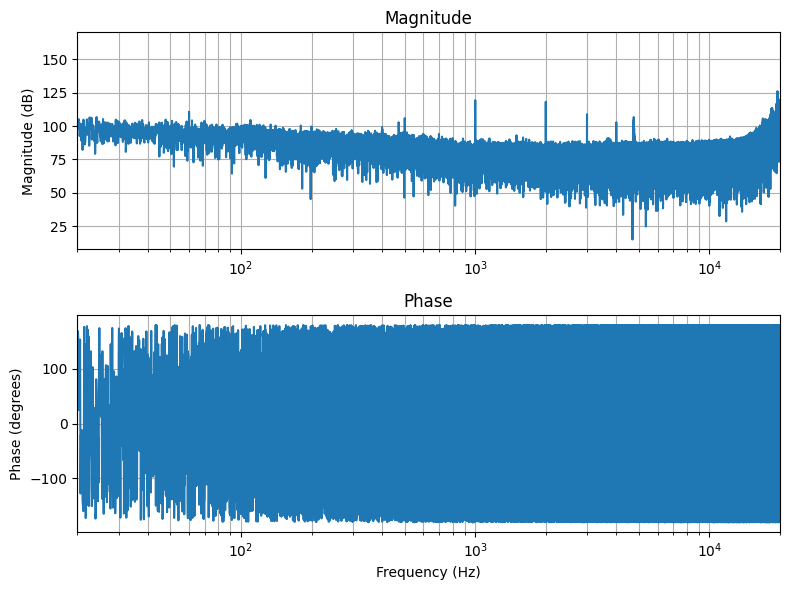

In [9]:
frequencies, magnitude, phase = apply_fft(impulse, impulse_rate)
plot_bode(frequencies, magnitude, phase)

frequencies, magnitude, phase = apply_fft(impulse_out, impulse_out_rate)
plot_bode(frequencies, magnitude, phase)

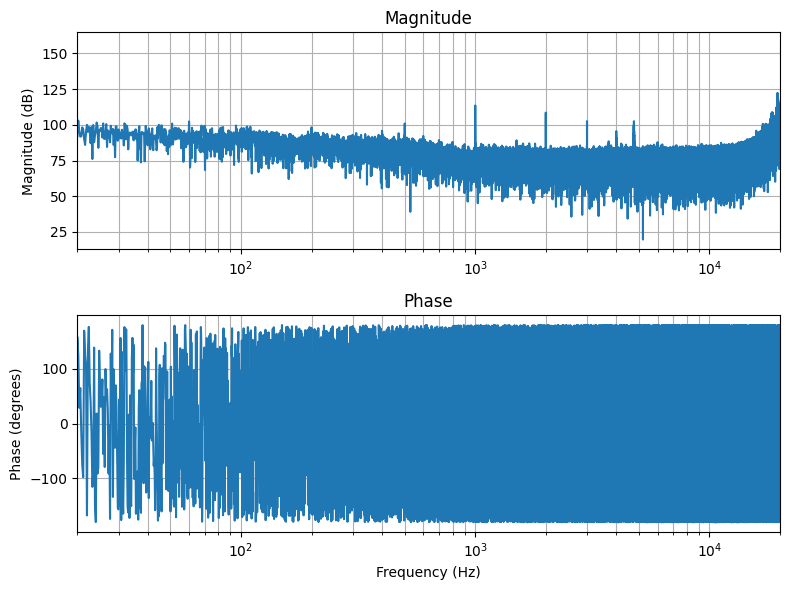

In [10]:
def compute_frequency_responce(impulse, impulse_out, sample_rate):
    # Perform FFT
    N = len(impulse)
    yf = fft(impulse)
    yf_out = fft(impulse_out)

    # obtener frecuencias
    xf = fftfreq(N, 1 / sample_rate)

    # Calcular magnitud y fase
    magnitude = np.abs(yf_out) / np.abs(yf)
    phase = np.angle(yf_out) - np.angle(yf)

    return xf[:N // 2], magnitude[:N // 2], phase[:N // 2] # devolver solo frecuencias positivas

# Dibuja el diagrama de Bode
if len(impulse) != len(impulse_out):
    if len(impulse) > len(impulse_out):
        impulse = impulse[:len(impulse_out)]
    else:
        impulse_out = impulse_out[:len(impulse)]
        
impulse_frequencies, impulse_magnitude, impulse_phase = compute_frequency_responce(impulse, impulse_out, impulse_rate)
plot_bode(impulse_frequencies, impulse_magnitude, impulse_phase)